In [ ]:
# Install reqs
!pip install --user Pillow
!pip install --user matplotlib
!pip install --user seaborn
!pip install --user sklearn
!pip install --user pandas

# RESTART AND CLEAR OUTPUT AFTER INSTALLING NEW DEPENDENCIES.

In [3]:
import os
import io
import json
import pathlib
import glob

import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf

import PIL
import PIL.Image

import matplotlib.pyplot as plt


# Image Example

In [4]:
image_df = pd.DataFrame([["zelensky.jpg"],["biden.jpg"]], columns=["filename"])

In [5]:
image_df.head()

filename
0  zelensky.jpg
1     biden.jpg

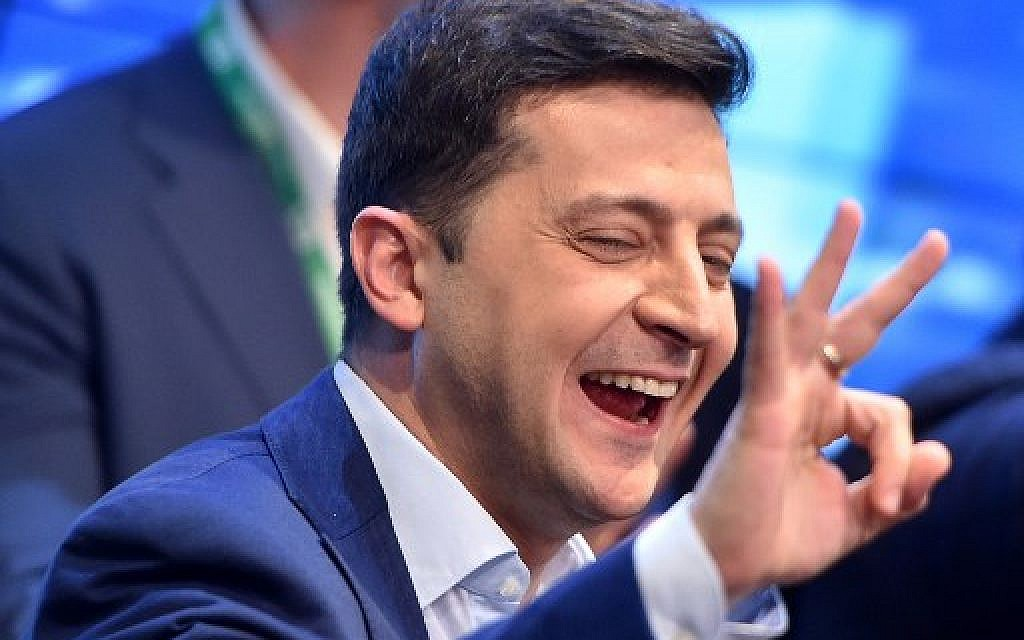

In [6]:
PIL.Image.open(os.path.join(os.getcwd(), str(image_df.filename[0])))

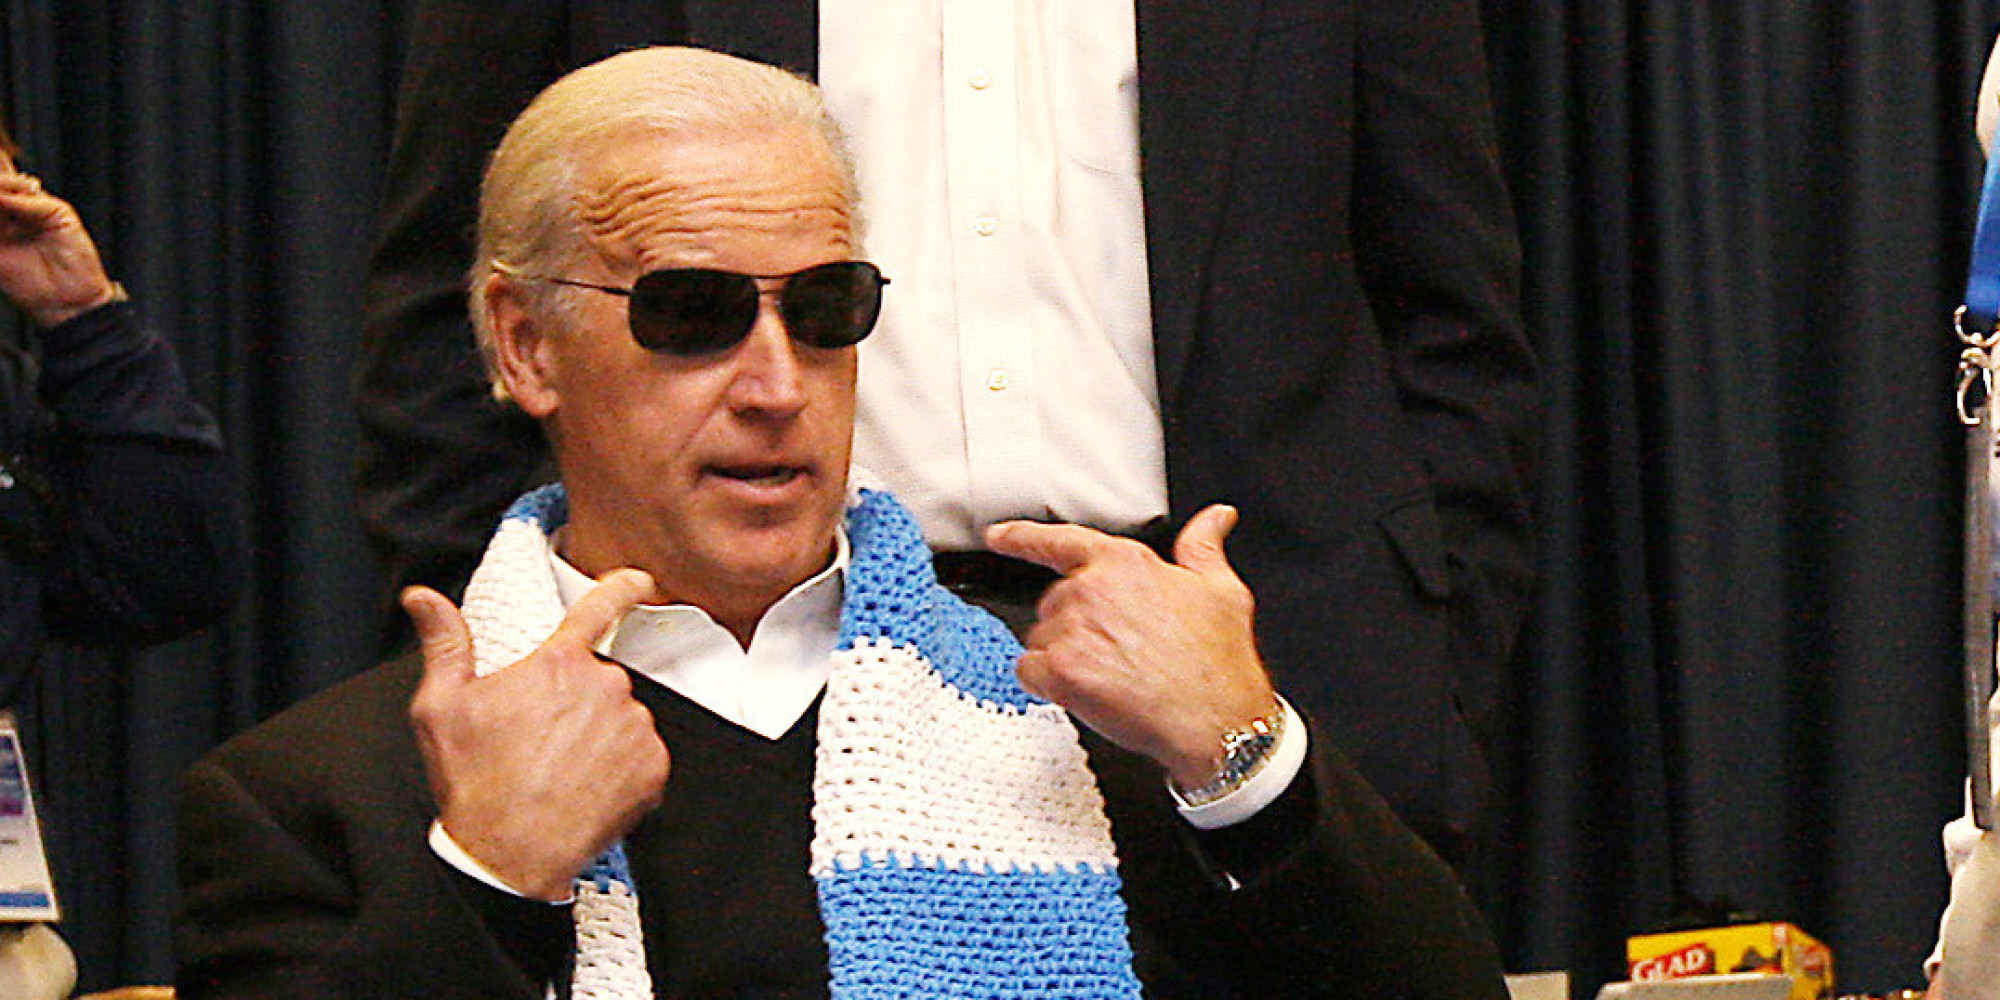

In [7]:
PIL.Image.open(os.path.join(os.getcwd(), str(image_df.filename[1])))

In [8]:
#TODO Improve cropping
img_height = 200
img_width = 200

images = []
for image_path in list(image_df.filename):
    full_path = os.path.join(os.getcwd(),image_path)
    image = tf.keras.preprocessing.image.load_img(full_path,color_mode='rgb',target_size=(img_height,img_width))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    images.append(input_arr)

x = images
print(x)

[array([[[ 13.,  53., 167.],
        [ 11.,  53., 173.],
        [ 17.,  60., 198.],
        ...,
        [ 35., 100., 252.],
        [ 35., 100., 252.],
        [ 35., 100., 252.]],

       [[ 13.,  53., 175.],
        [ 13.,  54., 180.],
        [ 19.,  62., 200.],
        ...,
        [ 35., 100., 252.],
        [ 35., 100., 252.],
        [ 35., 100., 252.]],

       [[ 16.,  58., 192.],
        [ 16.,  60., 195.],
        [ 21.,  68., 210.],
        ...,
        [ 34.,  99., 253.],
        [ 37., 102., 255.],
        [ 36., 101., 255.]],

       ...,

       [[ 26.,  35.,  68.],
        [ 27.,  37.,  72.],
        [ 41.,  54.,  98.],
        ...,
        [  2.,   1.,  19.],
        [  2.,   1.,  19.],
        [  2.,   1.,  19.]],

       [[ 25.,  36.,  68.],
        [ 26.,  39.,  71.],
        [ 35.,  48.,  90.],
        ...,
        [  2.,   1.,  19.],
        [  2.,   1.,  19.],
        [  2.,   1.,  19.]],

       [[ 26.,  37.,  67.],
        [ 26.,  40.,  69.],
        [ 33., 

In [10]:
plt.figure(figsize=(10, 10))
for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].astype("uint8"))
    plt.axis("off")

In [ ]:
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(64, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.BatchNormalization(),
# FLATTEN HERE!!!!!
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='tanh'),
#   tf.keras.layers.Dense(128, activation='tanh'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Numeric Example

In [11]:
num_df = pd.read_csv("fakedata.csv")

num_df.head()

height   salary
0      75   100052
1      72    95859
2      58    12558
3      80  2999887

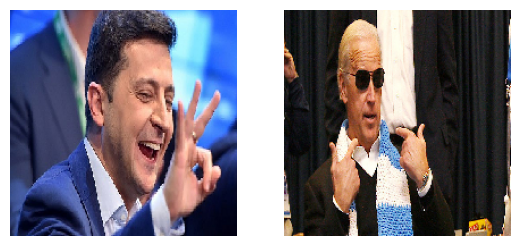

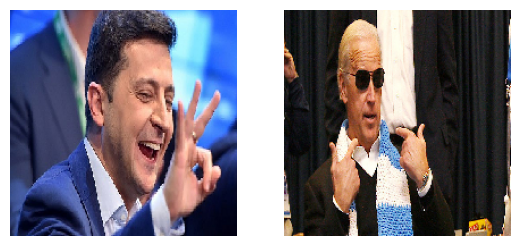

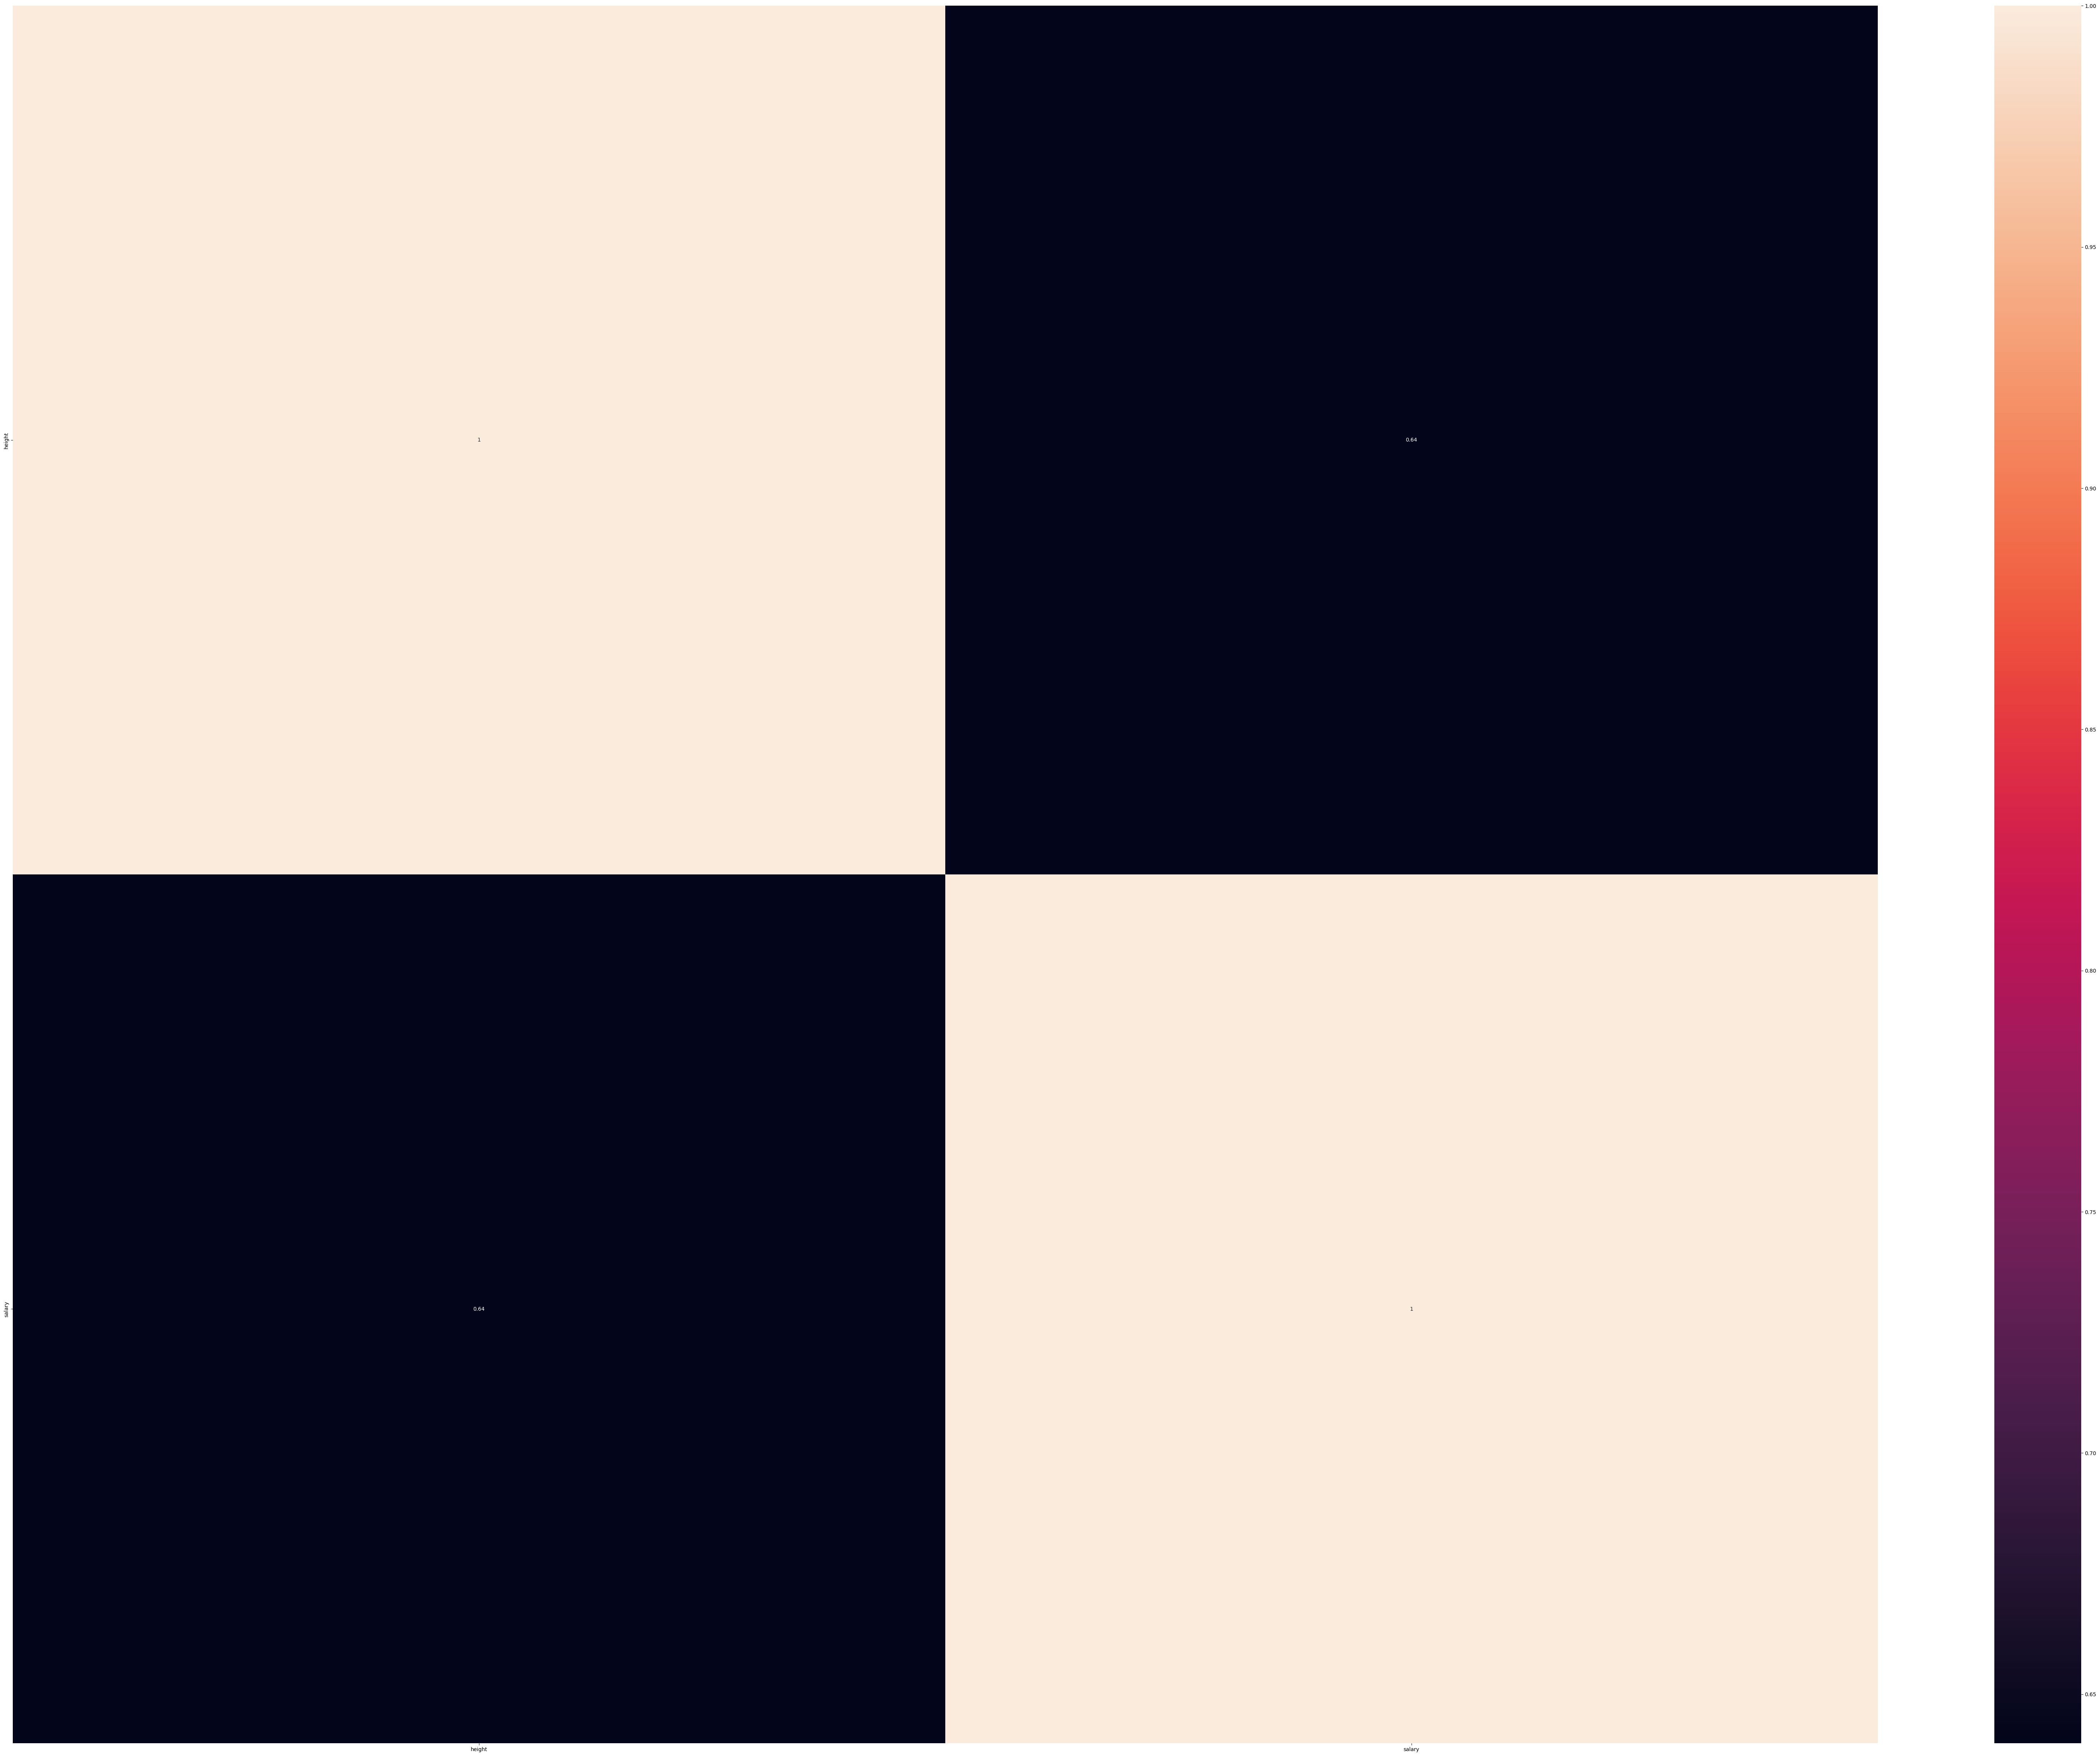

In [12]:
corr_matrix = num_df.corr()
plt.figure(figsize=(80,60))
sn.heatmap(corr_matrix, annot=True)
plt.show()

# Language

In [13]:
lang_df = pd.read_csv("names.csv")

lang_df.head()

name   salary
0      Josef   100052
1      Jimbo    95859
2      Maria    12558
3  Cristiano  2999887

In [14]:
from sklearn.preprocessing import LabelEncoder 

CATEGORICAL_COLUMNS = ['name']

for column in CATEGORICAL_COLUMNS:
    number = LabelEncoder()
    lang_df[column] = number.fit_transform(lang_df[column].astype('str')).astype(float)
    print(column)
    
    #Save your encodings!!!!
    le_name_mapping = dict(zip(number.classes_, number.transform(number.classes_)))
    with open(column+'_encoding.txt', 'w') as f:
        counter = 0
        for item in le_name_mapping:
            f.write("%s\n" % (item + ": " + str(counter)))
            counter+=1
    print(le_name_mapping)


name
{'Cristiano': 0, 'Jimbo': 1, 'Josef': 2, 'Maria': 3}


In [15]:
lang_df.head()

name   salary
0   2.0   100052
1   1.0    95859
2   3.0    12558
3   0.0  2999887

# Encrypted?!

In [16]:
import hashlib

print(hashlib.md5('Cristiano'.encode()).hexdigest())

03573d2cb487b1863796f26ea259dc0c


In [17]:
enc_df = pd.read_csv("encrypted.csv")

enc_df.head()

name                            salary
0  42478b0ad44efdb652e8b61efb8e84fe  3de74f78d82c374f9edd8dc7f3b126ed
1  3bf3311630c9dba4f9f5df138de287ec  223f7d5da10ede1b8ce507d0eeac2115
2  cbc19b07662418d5f14cc55657295924  004a68efcee088ddeaaca5c5a3afaa2f
3  03573d2cb487b1863796f26ea259dc0c  fa8a6b7945e74cd065088642613d8839

In [18]:
from sklearn.preprocessing import LabelEncoder 

CATEGORICAL_COLUMNS = ['name','salary']

for column in CATEGORICAL_COLUMNS:
    number = LabelEncoder()
    enc_df[column] = number.fit_transform(enc_df[column].astype('str')).astype(float)
    print(column)
    
    #Save your encodings!!!!
    le_name_mapping = dict(zip(number.classes_, number.transform(number.classes_)))
    with open(column+'_encrypted_encoding.txt', 'w') as f:
        counter = 0
        for item in le_name_mapping:
            f.write("%s\n" % (item + ": " + str(counter)))
            counter+=1
    print(le_name_mapping)


name
{'03573d2cb487b1863796f26ea259dc0c': 0, '3bf3311630c9dba4f9f5df138de287ec': 1, '42478b0ad44efdb652e8b61efb8e84fe': 2, 'cbc19b07662418d5f14cc55657295924': 3}
salary
{'004a68efcee088ddeaaca5c5a3afaa2f': 0, '223f7d5da10ede1b8ce507d0eeac2115': 1, '3de74f78d82c374f9edd8dc7f3b126ed': 2, 'fa8a6b7945e74cd065088642613d8839': 3}


In [19]:
enc_df.head()

name  salary
0   2.0     2.0
1   1.0     1.0
2   3.0     0.0
3   0.0     3.0